<a href="https://colab.research.google.com/github/Kim-Min-Gyeong/study-mldl/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1) #2차원 입력을 처리하는 합성곱 층, 뉴런 개수 10개, 커널 크기 3 * 3, 활성화 함수는 relu, same padding 적용, 1칸씩 이동


In [ ]:
keras.layers.Maxpooling2D(2, strides=2, padding='valid') #풀링 크기 지정

데이터 가져오기

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 #흑백 이미지의 경우 채널 차원이 없는 2차원 배열. Conv2D를 사용하려고 마지막에 이 채널 차원을 추가
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


4422102/4422102 [==============================] - 0s 0us/step


합성곱 신경망 생성

In [4]:
model = keras.Sequential()

#첫 합성곱-풀링 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1))) #합성곱 층 추가

model.add(keras.layers.MaxPooling2D(2)) #풀링층

#합성곱 층에서 32개의 필터를 사용해서, 이 특성 맵의 깊이는 32

#따라서 최대 풀링을 통과한 특성 맵의 크기는 (14, 14, 32)

#두 번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) #합성곱 층 추가

model.add(keras.layers.MaxPooling2D(2)) #풀링층

In [5]:
model.add(keras.layers.Flatten()) #(7, 7, 64) 크기의 특성 맵을 1차원으로 펼치기
model.add(keras.layers.Dense(100, activation='relu')) #Dense 은닉층, 100개의 뉴런
model.add(keras.layers.Dropout(0.4)) #은닉층의 과대적합 방지
model.add(keras.layers.Dense(10, activation='softmax')) #dense 출력층, 10개의 뉴런을 가진 출력층. 확률 계산

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

최종 특성 맵의 크기는 (7, 7, 64)

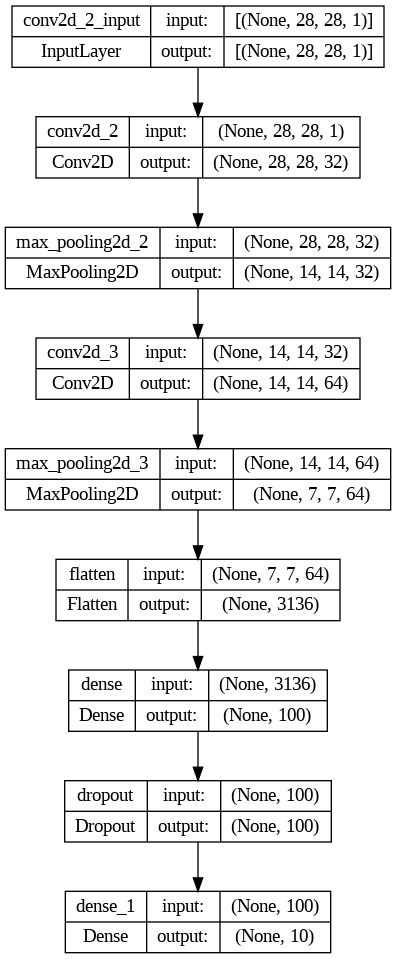

In [7]:
keras.utils.plot_model(model, show_shapes=True)

지금까지 한 것!

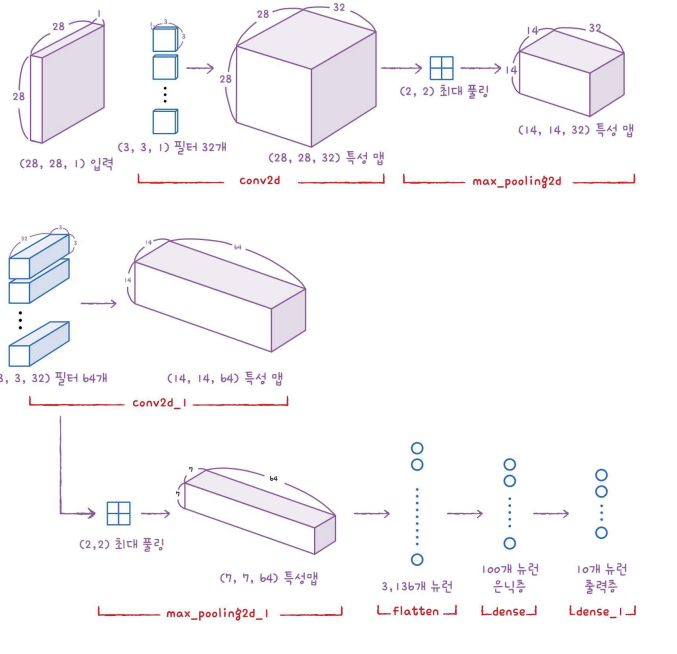

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 67s 44ms/step - loss: 0.5256 - accuracy: 0.8149 - val_loss: 0.3248 - val_accuracy: 0.8796
Epoch 2/20
   3/1500 [..............................] - ETA: 59s - loss: 0.4141 - accuracy: 0.8438 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 78s 52ms/step - loss: 0.3553 - accuracy: 0.8731 - val_loss: 0.2916 - val_accuracy: 0.8913
Epoch 3/20
1500/1500 [==============================] - 89s 60ms/step - loss: 0.3033 - accuracy: 0.8907 - val_loss: 0.2609 - val_accuracy: 0.9037
Epoch 4/20
1500/1500 [==============================] - 80s 54ms/step - loss: 0.2715 - accuracy: 0.9023 - val_loss: 0.2459 - val_accuracy: 0.9084
Epoch 5/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2432 - accuracy: 0.9121 - val_loss: 0.2380 - val_accuracy: 0.9107
Epoch 6/20
1500/1500 [==============================] - 85s 57ms/step - loss: 0.2255 - accuracy: 0.9174 - val_loss: 0.2336 - val_accuracy: 0.9132
Epoch 7/20
1500/1500 [==============================] - 106s 70ms/step - loss: 0.2085 - accuracy: 0.9240 - val_loss: 0.2256 - val_accuracy: 0.9169
Epoch 8/20
1500/1500 [==============================] - 99s 66ms/step - loss: 0.1924 - accuracy: 0.9288 - val_loss: 0.2223 - val_accur

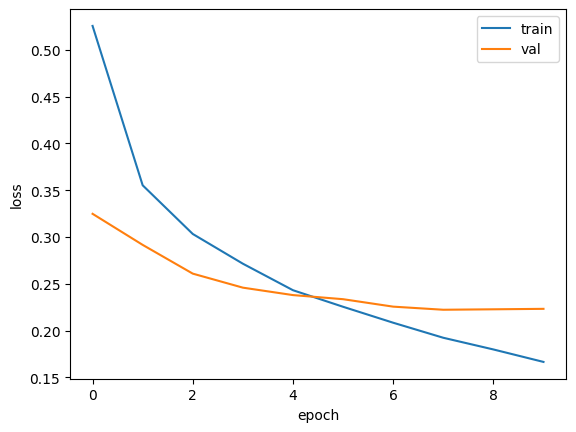

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
#성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 16ms/step - loss: 0.2223 - accuracy: 0.9201


[0.22231508791446686, 0.9200833439826965]

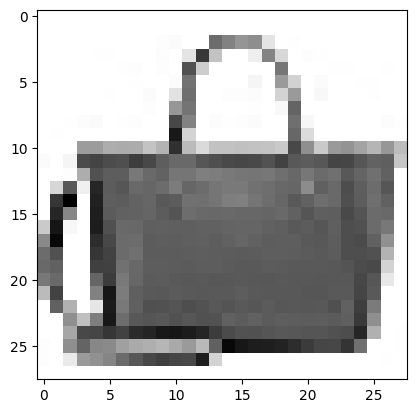

1/1 [==============================] - 0s 139ms/step
[[2.8620506e-19 9.6660528e-29 6.7129195e-22 4.6025178e-23 3.3261071e-20
  2.7064746e-16 2.1364512e-18 3.9811003e-21 1.0000000e+00 8.5812305e-24]]


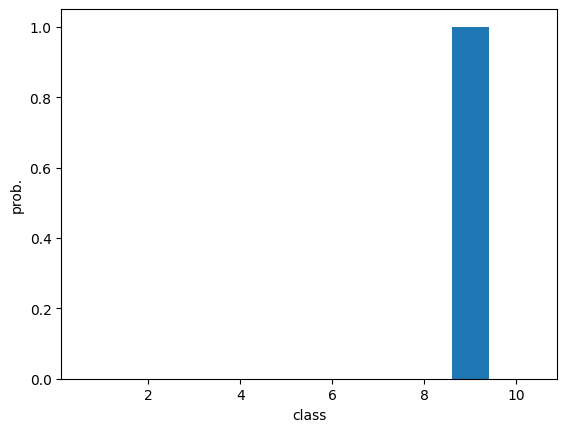

In [11]:
#훈련된 모델을 사용하여 새로운 데이터에 대해 예측
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

#예측 및 출력
preds = model.predict(val_scaled[0:1])
print(preds)

#막대 그래프 그림
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

**가방으로 예측**

In [12]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [13]:
import numpy as np
print(classes[np.argmax(preds)]) #preds 배열에서 가장 큰 인덱스를 찾아 classes의 인덱스로 사용

가방


In [14]:
#테스트 세트로 합성곱 신경망의 일반화 성능을 가늠
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 17ms/step - loss: 0.2422 - accuracy: 0.9140


[0.2421739250421524, 0.9139999747276306]

**8-3. CNN 시각화**

In [43]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [44]:
model.layers #케라스 모델에 추가한 층

In [45]:
#첫 번째 합성곱 층의 가중치를 조사
#층의 가중치와 절편은 층의 weights 속성에 저장
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


커널 크기를 (3, 3)으로 지정했었다. 그리고 이 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3, 3, 1)이다. <br>
또 필터의 개수가 32로 weights의 첫 번째 원소인 가중치의 크기는 (3, 3, 1, 32)이고, weights의 두 번재 원소인 절편의 개수는 각 필터마다 1개의 절편이 있으므로 (32, ) 크기이다.

In [46]:
conv_weights = conv.weights[0].numpy() #가중치 배열을 넘파이 배열로 반환
print(conv_weights.mean(), conv_weights.std()) #평균과 표준편차

-0.02086 0.23451641


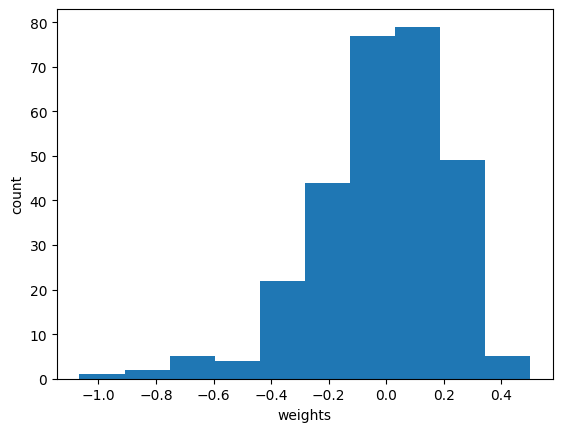

In [19]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1)) #hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야 한다.
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

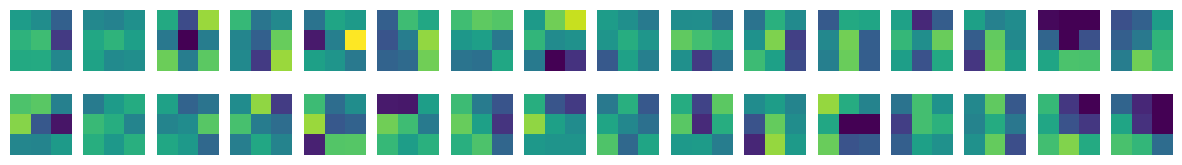

In [20]:
#32개의 커널을 16개씩 두 줄에 출력
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5) #배열에 있는 최댓값과 최솟값을 이용해 픽셀의 강도를 표현
        axs[i, j].axis('off')

plt.show()

**빈 합성곱 신경망 만들기**

In [21]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [22]:
no_training_conv = no_training_model.layers[0] #이 층의 가중치 저장
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [23]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.00081128045 0.08091715


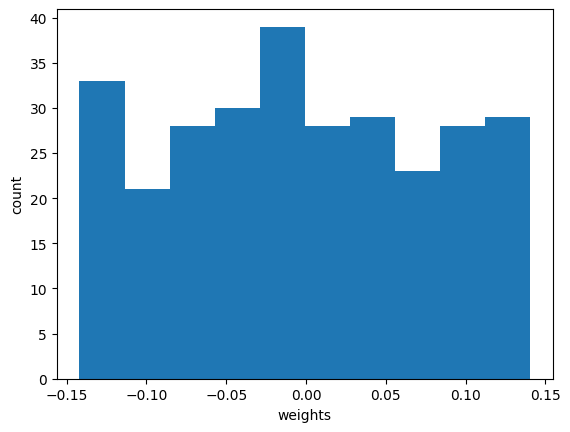

In [24]:
plt.hist(no_training_weights.reshape(-1, 1)) #hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야 한다.
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

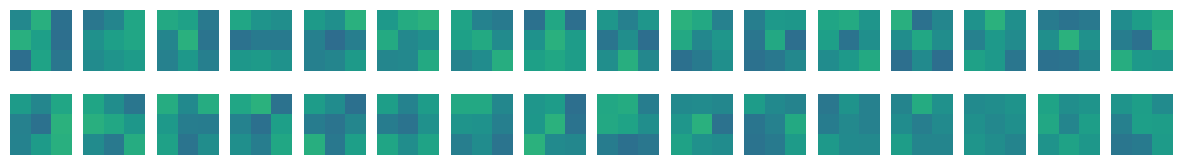

In [25]:
#32개의 커널을 16개씩 두 줄에 출력
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5) #배열에 있는 최댓값과 최솟값을 이용해 픽셀의 강도를 표현
        axs[i, j].axis('off')

plt.show()

**함수형 API**

In [26]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [28]:
inputs = keras.Input(shape=(784, )) #Model 클래스에서는 우리가 수동으로 InputLayer의 출력을 만들어야 한다.

In [30]:
hidden = dense1(inputs) #입력값 inputs을 Dense1 층에 통과시킨 후 출력값 hidden 생성

In [31]:
outputs = dense2(hidden)

In [33]:
model = keras.Model(inputs, outputs) #입력에서 출력까지 층을 호출한 결과를 계속 이어서 Model 클래스에 입력과 최종 출력을 지정

In [52]:
print(model.input) #모델의 입력

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [53]:
conv_acti = keras.Model(model.input, model.layers[0].output) #conv_acti의 predict()를 호출하면 첫 번째 Conv2D의 출력을 반환하도록

**특성맵 시각화**

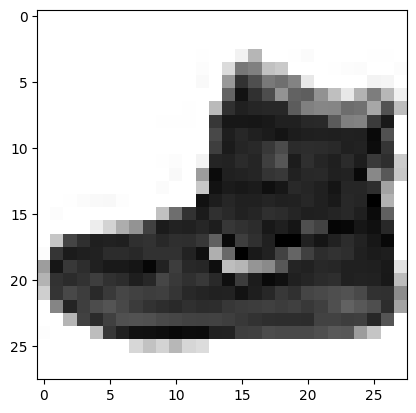

In [54]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [55]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)


1/1 [==============================] - 0s 52ms/step


In [56]:
print(feature_maps.shape)

(1, 28, 28, 32)


첫 번째 차원은 배치 차원이다, 샘플을 하나만 입력해서 1이다.

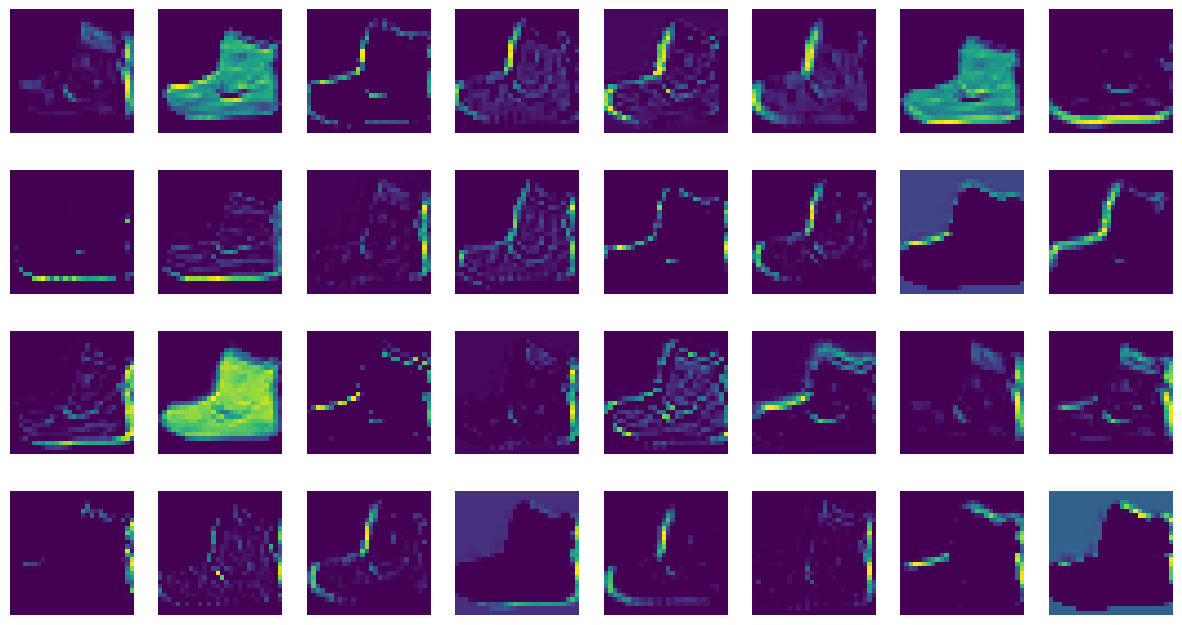

In [60]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')

plt.show()

In [61]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [62]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 69ms/step


In [63]:
print(feature_maps.shape)

(1, 14, 14, 64)


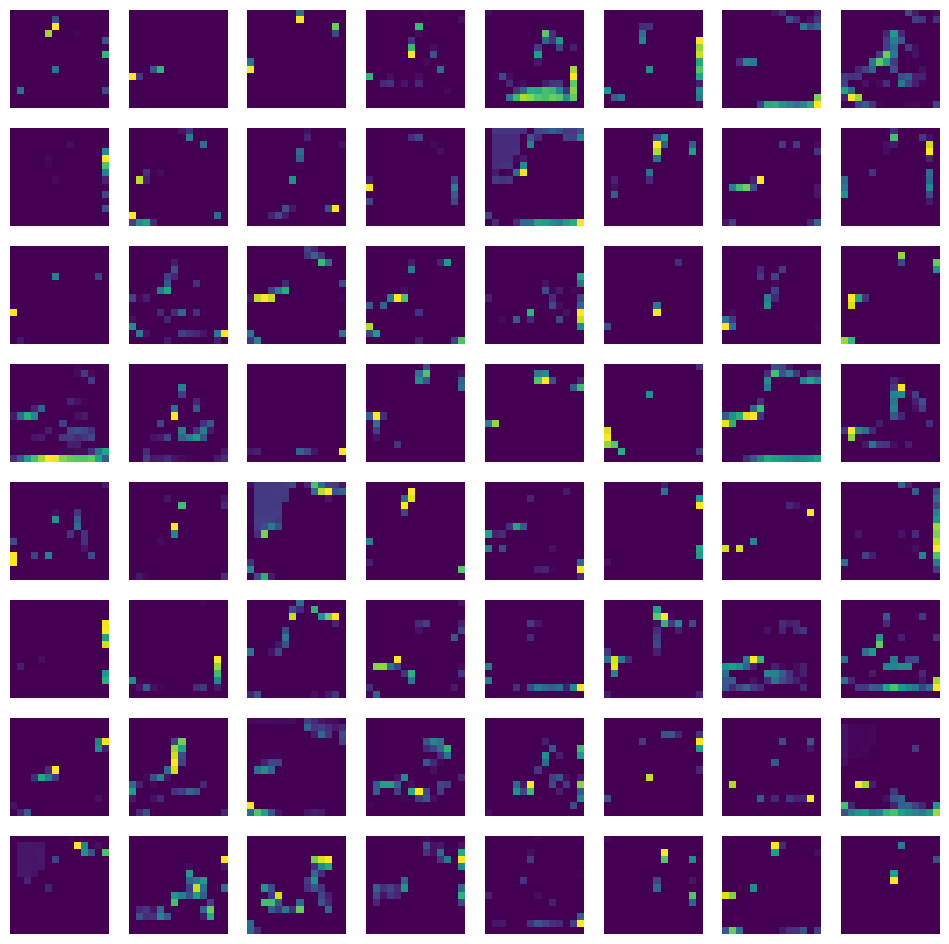

In [64]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')

plt.show()